# Import Libraries

In [126]:
import pytesseract
from PIL import Image

import os

In [127]:
pytesseract.pytesseract.tesseract_cmd = r'C://Program Files//Tesseract-OCR//tesseract.exe'

os.environ["TESSDATA_PREFIX"] =  "C://Program Files//Tesseract-OCR//tessdata"
custom_config = r'-c preserve_interword_spaces=5 --oem 3 --psm 0 '

# Test Image

In [128]:
image_path = 'tt.png'
img = Image.open(image_path)

In [129]:
print(img)

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=992x761 at 0x1AC2A814FA0>


# Detect Text Orientation

In [130]:
orientation_data = pytesseract.image_to_osd(img)
rotate_angle = int(orientation_data.split('\n')[1].split(':')[1])
# transpose

In [131]:
orientation_data

'Page number: 0\nOrientation in degrees: 270\nRotate: 90\nOrientation confidence: 1.14\nScript: Arabic\nScript confidence: 15.33\n'

In [132]:
# Rotate the image
if rotate_angle > 180:
    rotated_img = img.rotate(-rotate_angle)
else:
    rotated_img = img.rotate(rotate_angle)

In [133]:
transposed_img = rotated_img.transpose(Image.Transpose.ROTATE_270)

In [139]:
rotated_img.show()  # Display the rotated image

In [138]:
text = pytesseract.image_to_string(rotated_img, lang='eng', config="-c preserve_interword_spaces=5 --oem 3 --psm 10")
text

''

In [94]:
print(rotate_angle)

270


[OSD] Page number: 0
Orientation in degrees: 90
Rotate: 270
Orientation confidence: 12.24
Script: Latin
Script confidence: 12.16

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 15.92
Script: Latin
Script confidence: 11.67

[TEXT]
Summary

In this tutorial, you learned how to perform automatic text orientation detection and
correction using Tesseract’s orientation and script detection (OSD) mode.

The OSD mode provides us with meta-data of the text in the image, including both
estimated text orientation and script/writing system detection. The text
orientation refers to the angle (in degrees) of the text in the image. When
performing OCR, we can obtain higher accuracy by correcting for the text
orientation. Script detection, on the other hand, refers to the writing system of the
text, which could be Latin, Hanzi, Arabic, Hebrew, etc.



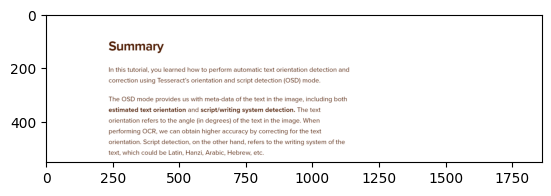

In [141]:
import cv2
import pytesseract
import urllib
import numpy as np
import re
import imutils #added
import matplotlib.pyplot as plt
image = cv2.imread('test.png')
# image = cv2.imdecode(image, cv2.IMREAD_COLOR) # Initially decode as color
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)

rot_data = pytesseract.image_to_osd(image);
print("[OSD] "+rot_data)
rot = re.search('(?<=Rotate: )\d+', rot_data).group(0)

angle = float(rot)

# rotate the image to deskew it
rotated = imutils.rotate_bound(image, angle) #added
plt.imshow(rotated)

#  TODO: Rotated image can be saved here
print(pytesseract.image_to_osd(rotated));
print("[TEXT]")
# Run tesseract OCR on image
text = pytesseract.image_to_string(rotated, lang='eng', config="--psm 6")

# Print recognized text
print(text)